In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Extracting zip folder
file_name = '/content/drive/MyDrive/Blockchain/LoanStats3a.csv.zip'
from zipfile import ZipFile
with ZipFile(file_name, 'r',) as zip:
  zip.extractall()
  print('Done!!')

Done!!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('LoanStats3a.csv', low_memory= False, skiprows= 1)

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,"5,000.0000","5,000.0000","4,975.0000",36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,"24,000.0000",Verified,Dec-2011,Fully Paid,n,nan,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0.0000,Jan-1985,1.0000,nan,nan,3.0000,0.0000,"13,648.0000",83.7%,9.0000,f,0.0000,0.0000,"5,863.1552","5,833.8400",...,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,"2,500.0000","2,500.0000","2,500.0000",60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,"30,000.0000",Source Verified,Dec-2011,Charged Off,n,nan,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0.0000,Apr-1999,5.0000,nan,nan,3.0000,0.0000,"1,687.0000",9.4%,4.0000,f,0.0000,0.0000,"1,014.5300","1,014.5300",...,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,"2,400.0000","2,400.0000","2,400.0000",36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,"12,252.0000",Not Verified,Dec-2011,Fully Paid,n,nan,NaN,small_business,real estate business,606xx,IL,8.7200,0.0000,Nov-2001,2.0000,nan,nan,2.0000,0.0000,"2,956.0000",98.5%,10.0000,f,0.0000,0.0000,"3,005.6668","3,005.6700",...,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,"10,000.0000","10,000.0000","10,000.0000",36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.0000",Source Verified,Dec-2011,Fully Paid,n,nan,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0.0000,Feb-1996,1.0000,35.0000,nan,10.0000,0.0000,"5,598.0000",21%,37.0000,f,0.0000,0.0000,"12,231.8900","12,231.8900",...,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,"3,000.0000","3,000.0000","3,000.0000",60 months,12.69%,67.7900,B,B5,University Medical Group,1 year,RENT,"80,000.0000",Source Verified,Dec-2011,Fully Paid,n,nan,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.9400,0.0000,Jan-1996,0.0000,38.0000,nan,15.0000,0.0000,"27,783.0000",53.9%,38.0000,f,0.0000,0.0000,"4,066.9082","4,066.9100",...,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


In [ ]:
df.shape

(42538, 145)

In [ ]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0000,"42,535.0000","42,535.0000","42,535.0000","42,535.0000","42,531.0000",0.0000,"42,535.0000","42,506.0000","42,506.0000","15,609.0000","3,651.0000","42,506.0000","42,506.0000","42,535.0000","42,506.0000","42,535.0000","42,535.0000","42,535.0000","42,535.0000","42,535.0000","42,535.0000","42,535.0000","42,535.0000","42,535.0000","42,535.0000","42,390.0000",0.0000,"42,535.0000",0.0000,0.0000,0.0000,"42,506.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"41,170.0000","42,430.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,160.0000,160.0000,160.0000
mean,nan,"11,089.7226","10,821.5858","10,139.9388",322.6231,"69,136.5564",nan,13.3730,0.1524,1.0814,35.0176,59.1756,9.3440,0.0582,"14,297.8609",22.1244,0.0000,0.0000,"12,020.1896","11,312.7294","9,675.6759","2,239.9814",1.5169,103.0155,14.3878,"2,613.2457",0.0000,nan,1.0000,nan,nan,nan,0.0001,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.0452,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"4,272.1379",49.9059,1.2000
std,nan,"7,410.9384","7,146.9147","7,131.5980",208.9272,"64,096.3497",nan,6.7263,0.5124,1.5275,22.4184,47.1454,4.4963,0.2457,"22,018.4410",11.5928,0.0000,0.0000,"9,094.6859","9,038.5065","7,105.7503","2,585.0574",7.8301,735.7991,162.1778,"4,385.0665",0.0000,nan,0.0000,nan,nan,nan,0.0097,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.2087,0.0049,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"3,119.3738",15.5637,4.0853
min,nan,500.0000,500.0000,0.0000,15.6700,"1,896.0000",nan,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,nan,1.0000,nan,nan,nan,0.0000,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,193.2900,10.6900,0.0000
25%,nan,"5,200.0000","5,000.0000","4,950.0000",165.5200,"40,000.0000",nan,8.2000,0.0000,0.0000,17.0000,0.0000,6.0000,0.0000,"3,635.0000",13.0000,0.0000,0.0000,"5,465.6852","4,793.1150","4,400.0000",657.1000,0.0000,0.0000,0.0000,211.0500,0.0000,nan,1.0000,nan,nan,nan,0.0000,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

# DELETING 100% NULL NUMERIC COLUMNS

In [ ]:
nan_col = []
for i in df.columns:
  if df[i].dtype == 'float64' and df[i].describe()['count'] == 0.0: 
    nan_col.append(i)
# nan_col # NAN numeric columns

In [ ]:
#Drop 81 NAN numeric columns
df.drop(nan_col, axis=1, inplace=True)

In [ ]:
df.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,NaN,Aug-2018,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(42538, 64)

# Deleting columns with only 1 value
because there will not be contributing in decision making

In [ ]:
def stats_generate(df):
    stats = []
    columns_names = ['Column Name', 'Unique_values', 'Percentage of NULL values', 'data type']
    for col in df.columns:
      unique = df[col].nunique()
      null_Percentage = df[col].isnull().sum() * 100 / df.shape[0]
      dataType = df[col].dtype
      stats.append((col,unique ,null_Percentage,dataType ))

    stats_df = pd.DataFrame(stats, columns=columns_names)
    # stats_df.sort_values('Percentage of NULL values', ascending=False)
    return stats_df
Generated_Stats = stats_generate(df)

In [ ]:
Generated_Stats.head(50)

,Column Name,Unique_values,Percentage of NULL values,data type
0,id,3,99.992947,object
1,loan_amnt,898,0.007053,float64
2,funded_amnt,1051,0.007053,float64
3,funded_amnt_inv,9248,0.007053,float64
4,term,2,0.007053,object
5,int_rate,394,0.007053,object
6,installment,16459,0.007053,float64
7,grade,7,0.007053,object
8,sub_grade,35,0.007053,object
9,emp_title,30658,6.180356,object


There are:
53 columns without missing values
53 columns with less than 10% of missing values
 1 columns with missing values between 10% and 50%
 10 columns with more than 50% of missing values


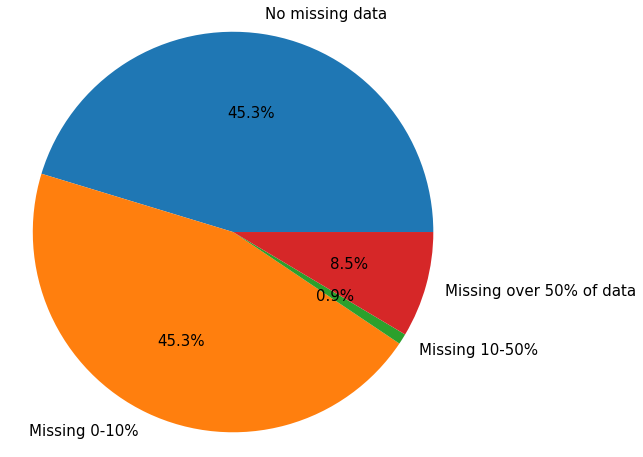

In [ ]:
col= "Percentage of NULL values"
analysis = (Generated_Stats[col] <= 10).sum()
a = ((Generated_Stats[col]!=0) & (Generated_Stats[col]<=10)).sum()
b = ((Generated_Stats[col]>10) & (Generated_Stats[col]<=50)).sum()
c = (Generated_Stats[col]>50).sum()
print("There are:\n{} columns without missing values\n{} columns with less than 10% of missing values\n {} columns with missing values between 10% and 50%\n {} columns with more than 50% of missing values".format(analysis,a,b,c))

labels =["No missing data", "Missing 0-10%", "Missing 10-50%", "Missing over 50% of data"]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie([analysis,a,b,c], autopct='%1.1f%%',labels=labels, textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

In [ ]:
unique1_col = []
for i in df.columns:
  if df[i].nunique() == 1: 
    unique1_col.append(i)
unique1_col # Having 1 unique columns

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths',
 'hardship_flag',
 'disbursement_method']

In [ ]:
#Drop unique 1 value columns
df.drop(unique1_col, axis=1, inplace=True)
df.shape

(42538, 54)

# Deleting NULL values columns other than numeric

In [ ]:
null90_col = []
for i in df.columns:
  if df[i].isnull().sum() * 100 / df.shape[0] >= 90.0: 
    null90_col.append(i)
null90_col # Having 90% null columns

['id',
 'mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [ ]:
#Drop 90% null value columns
df.drop(null90_col, axis=1, inplace=True)
df.shape

(42538, 45)

In [ ]:
df.drop(['mths_since_last_delinq','desc', 'emp_title','title'], axis=1, inplace=True)

In [ ]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,Aug-2018,0.0,0.0,0.0,0.0,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,0.0,0.0,0.0,N


In [ ]:
def Catergories(df,col):
  print("---",col,"---")
  print("Column unique values: ",df[col].unique())
  print("nan values: ",sum(pd.isnull(df[col])))
  df[col].value_counts().plot(kind = 'bar');
  plt.title(col)
  plt.ylabel('Number of Occurrences', fontsize=12)
  plt.xlabel(col, fontsize=12)
  plt.show()

In [ ]:
df.dropna(subset=['loan_status'], inplace=True)
df.shape

(42535, 41)

--- emp_length ---
Column unique values:  ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
nan values:  1112


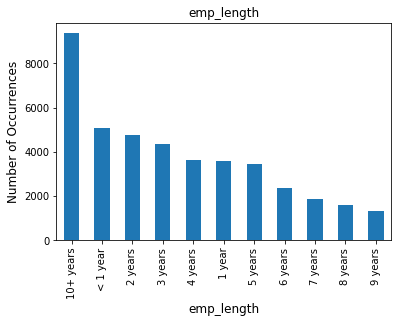

In [ ]:
Catergories(df,'emp_length')

--- grade ---
Column unique values:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
nan values:  0


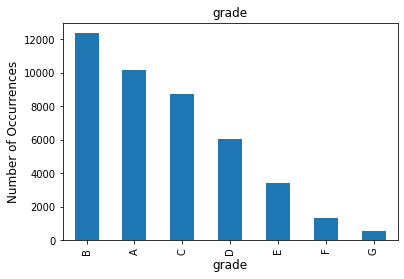

In [ ]:
Catergories(df,'grade')

--- tax_liens ---
Column unique values:  [ 0. nan  1.]
nan values:  105


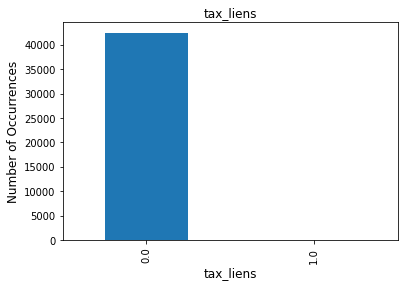

In [ ]:
Catergories(df, 'tax_liens')

--- delinq_amnt ---
Column unique values:  [   0.   nan   27. 6053.]
nan values:  29


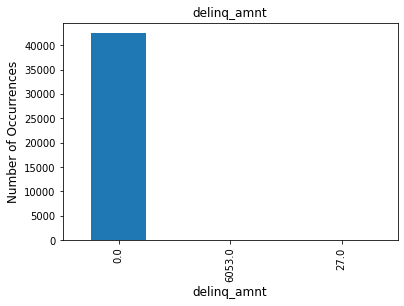

In [ ]:
Catergories(df, 'delinq_amnt')

--- term ---
Column unique values:  [' 36 months' ' 60 months']
nan values:  0


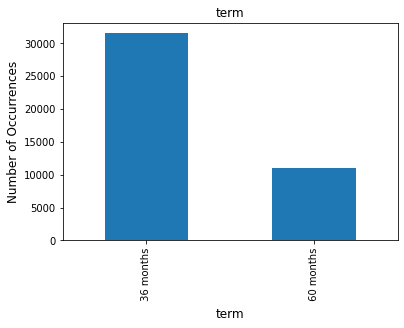

In [ ]:
Catergories(df,'term')

--- pub_rec ---
Column unique values:  [ 0.  1.  2.  3.  4.  5. nan]
nan values:  29


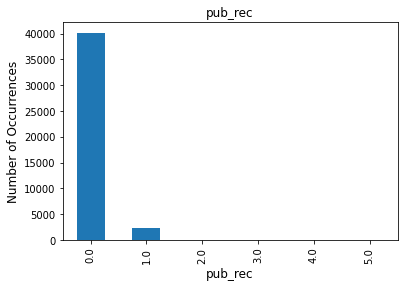

In [ ]:
Catergories(df,'pub_rec')

--- loan_status ---
Column unique values:  ['Fully Paid' 'Charged Off'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
nan values:  0


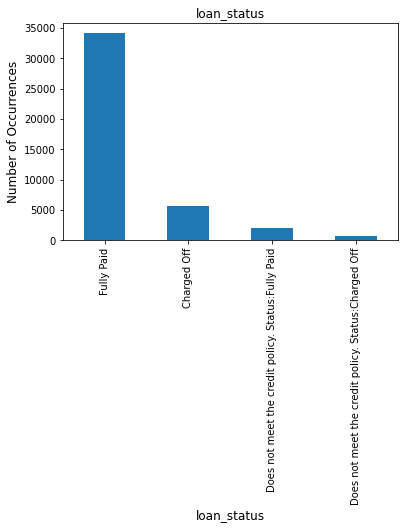

In [ ]:
Catergories(df, 'loan_status')

Column unique values:  ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
nan values:  0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


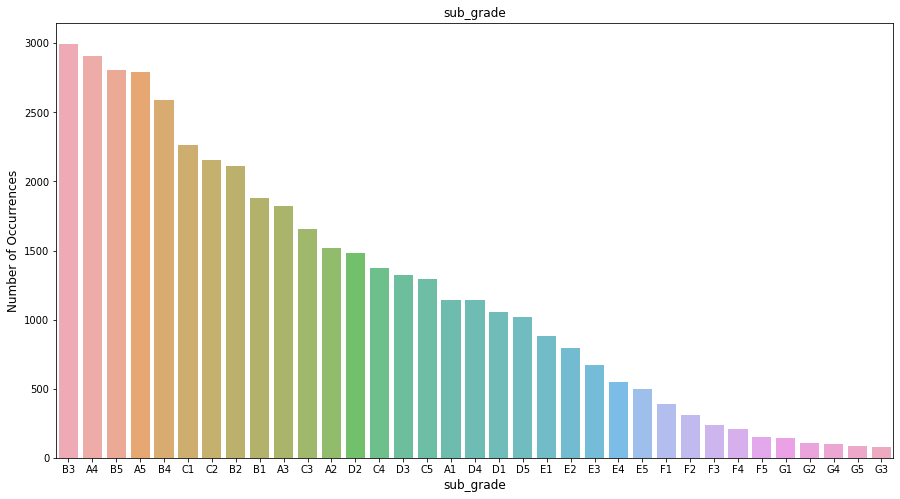

In [ ]:
# Catergories(df,'sub_grade')
col = 'sub_grade'
print("Column unique values: ",df[col].unique())
print("nan values: ",sum(pd.isnull(df[col])))
count  = df[col].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title(col)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel(col, fontsize=12)
plt.show()

Column unique values:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
nan values:  0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


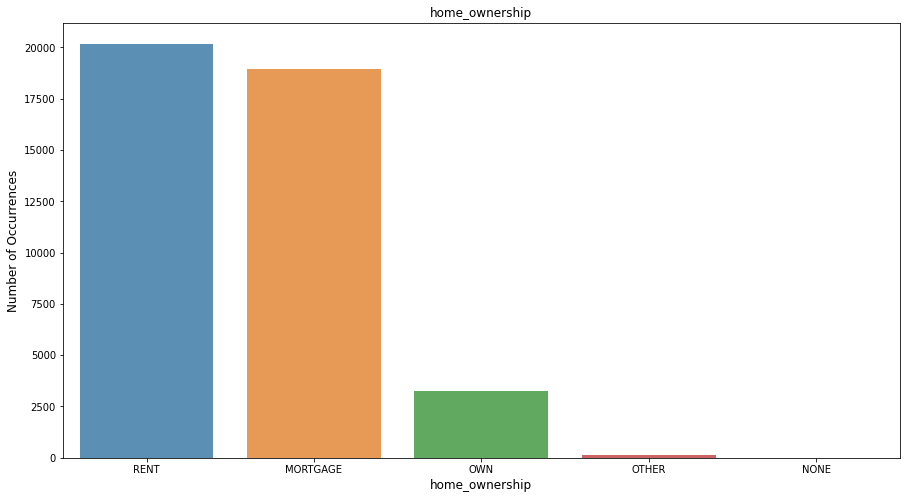

In [ ]:
col = 'home_ownership'
print("Column unique values: ",df[col].unique())
print("nan values: ",sum(pd.isnull(df[col])))
count  = df[col].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title(col)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel(col, fontsize=12)
plt.show()

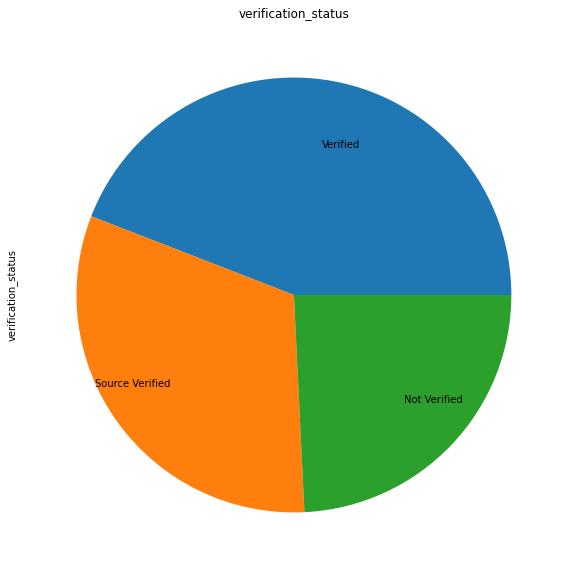

In [ ]:
col = 'verification_status'
df[col].value_counts().plot.pie(labels= df[col].unique() , labeldistance = 0.7,figsize=(10, 10))
plt.title(col)
plt.show()

In [ ]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,"5,000.0000","5,000.0000","4,975.0000",36 months,10.65%,162.8700,B,B2,10+ years,RENT,"24,000.0000",Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.6500,0.0000,Jan-1985,1.0000,3.0000,0.0000,"13,648.0000",83.7%,9.0000,"5,863.1552","5,833.8400","5,000.0000",863.1600,0.0000,0.0000,0.0000,Jan-2015,171.6200,Aug-2018,0.0000,0.0000,0.0000,0.0000,N
1,"2,500.0000","2,500.0000","2,500.0000",60 months,15.27%,59.8300,C,C4,< 1 year,RENT,"30,000.0000",Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.0000,0.0000,Apr-1999,5.0000,3.0000,0.0000,"1,687.0000",9.4%,4.0000,"1,014.5300","1,014.5300",456.4600,435.1700,0.0000,122.9000,1.1100,Apr-2013,119.6600,Oct-2016,0.0000,0.0000,0.0000,0.0000,N


In [ ]:
df['zip_code'] = df['zip_code'].str.rstrip('x')
df.int_rate = df.int_rate.str.rstrip('%')
df.revol_util = df.revol_util.str.rstrip('%')
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,Aug-2018,0.0,0.0,0.0,0.0,N
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,0.0,0.0,0.0,N


In [ ]:
def convertToCat(df,col):
  df[col] = df[col].astype('category')
  df[col]= df[col].cat.codes

In [ ]:
categorical_Col= ['term','grade','sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']
for i in categorical_Col:
  convertToCat(df,i)

df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,1,4,24000.0,2,Dec-2011,Fully Paid,1,860,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,Aug-2018,0.0,0.0,0.0,0.0,N
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,10,4,30000.0,1,Dec-2011,Charged Off,0,309,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,0.0,0.0,0.0,N


In [ ]:
convertToCat(df, 'loan_status')

In [ ]:
df.shape

(42535, 41)

In [ ]:
def correlation(col1,col2,col3):
  sns.heatmap(df[[col1,col2,col3]].corr(method ='pearson'), cmap='RdBu_r', annot=True, center=0.5, vmin =0, vmax=1)
  plt.title('Correlation between' +' '+col1+ '~'+' '+ col2 +'columns\n')
  plt.show()

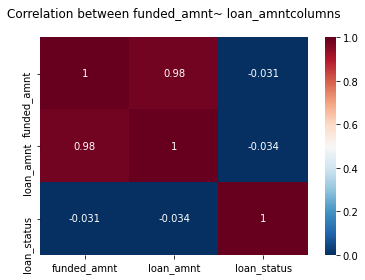

In [ ]:
correlation('funded_amnt','loan_amnt','loan_status')

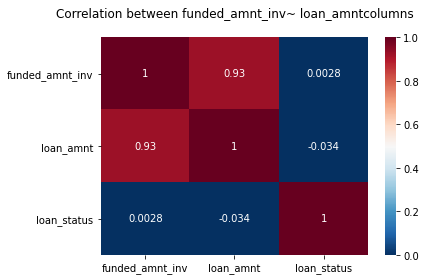

In [ ]:
correlation('funded_amnt_inv','loan_amnt','loan_status')

In [ ]:
df.drop(['funded_amnt_inv', 'funded_amnt'], axis=1, inplace=True)

In [ ]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.0,0,10.65,162.87,1,6,1,4,24000.0,2,Dec-2011,3,1,860,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,Aug-2018,0.0,0.0,0.0,0.0,N
1,2500.0,1,15.27,59.83,2,13,10,4,30000.0,1,Dec-2011,0,0,309,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,0.0,0.0,0.0,N


In [ ]:
def get_skewwed_dataframe(df):
    pd.options.display.float_format = '{:,.4f}'.format
    sk_df = pd.DataFrame([{'column': c, 
                          'uniq': df[c].nunique(), 
                          'skewness': df[c].value_counts(normalize=True).values[0] * 100
                          } for c in df.columns])
    sk_df = sk_df.sort_values('skewness', ascending=False)
    return sk_df

In [ ]:
_skewwed_data = get_skewwed_dataframe(df)

In [ ]:
_skewwed_data.head(10)

,column,uniq,skewness
37,tax_liens,2,99.9976
35,delinq_amnt,3,99.9953
34,acc_now_delinq,2,99.9906
38,debt_settlement_flag,2,99.6238
36,pub_rec_bankruptcies,3,95.4967
20,pub_rec,6,94.4102
28,total_rec_late_fee,2299,94.3811
30,collection_recovery_fee,2897,89.8249
16,delinq_2yrs,12,88.8604
29,recoveries,5058,85.0500


In [ ]:
df.drop(['tax_liens', 'delinq_amnt', 'delinq_amnt', 'addr_state', 'debt_settlement_flag','pub_rec_bankruptcies', 'pub_rec','total_rec_late_fee'], axis=1, inplace=True)

In [ ]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq
0,5000.0,0,10.65,162.87,1,6,1,4,24000.0,2,Dec-2011,3,1,860,27.65,0.0,Jan-1985,1.0,3.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,Jan-2015,171.62,Aug-2018,0.0
1,2500.0,1,15.27,59.83,2,13,10,4,30000.0,1,Dec-2011,0,0,309,1.00,0.0,Apr-1999,5.0,3.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0


In [ ]:
df_train = df.copy()
df_train.drop(['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d' ], axis=1, inplace=True)
df_train.shape

(42535, 28)

In [ ]:
df_train.dropna(axis=0, inplace=True)
df_train.shape

(42445, 28)

In [ ]:
target = df_train['loan_status']
df_train.drop(['loan_status'], axis =1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, target, stratify = target, random_state=42, test_size =0.15)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
print(x_train.shape, x_test.shape)

(36078, 27) (6367, 27)


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test)

In [ ]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',
    'num_class': 4,
    'n_gpus': 0,
    'eta' : 0.1,
}

In [ ]:
bst = xgb.train(params, dtrain)
pred = bst.predict(dtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       848
           1       0.81      0.69      0.75       113
           2       0.87      0.67      0.76       293
           3       0.98      0.99      0.99      5113

    accuracy                           0.97      6367
   macro avg       0.91      0.83      0.86      6367
weighted avg       0.97      0.97      0.97      6367



In [ ]:
cm = confusion_matrix(y_test, pred)
cm

array([[ 822,   18,    0,    8],
       [  34,   78,    1,    0],
       [   0,    0,  195,   98],
       [   0,    0,   27, 5086]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=20, class_weight='balanced')
forest.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Accuracy on training set: 0.997
Accuracy on test set: 0.975


In [ ]:
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=10, random_state=20, criterion='entropy', max_depth=3)
scores = cross_val_score(forest, x_train, y_train,cv=5)
print("cross-validation scores: ", scores)
print ("Mean Cross-validation score: ", scores.mean())

cross-validation scores:  [0.93417406 0.93500554 0.93375831 0.93485793 0.93485793]
Mean Cross-validation score:  0.9345307570917327


In [ ]:
from sklearn import metrics    
# make predictions
forest.fit(x_train, y_train)
expected_y  = y_test
predicted_y = forest.predict(x_test)
    
# summarize the fit of the model
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       848
           1       1.00      0.01      0.02       113
           2       0.00      0.00      0.00       293
           3       0.94      1.00      0.97      5113

    accuracy                           0.93      6367
   macro avg       0.71      0.50      0.48      6367
weighted avg       0.89      0.93      0.90      6367


[[ 830    0    0   18]
 [ 108    1    0    4]
 [   0    0    0  293]
 [   0    0    0 5113]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=10, random_state=20, criterion='entropy', max_depth=3,class_weight='balanced')
scores = cross_val_score(forest, x_train, y_train,cv=5)
print("cross-validation scores: ", scores)
print ("Mean Cross-validation score: ", scores.mean())

cross-validation scores:  [0.83841463 0.92863082 0.91879157 0.95051975 0.88898129]
Mean Cross-validation score:  0.9050676136651747


In [ ]:
from sklearn import metrics    
# make predictions
forest.fit(x_train, y_train)
expected_y  = y_test
predicted_y = forest.predict(x_test)
    
# summarize the fit of the model
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       848
           1       0.72      0.73      0.72       113
           2       0.31      0.83      0.45       293
           3       0.99      0.89      0.94      5113

    accuracy                           0.90      6367
   macro avg       0.75      0.85      0.77      6367
weighted avg       0.95      0.90      0.92      6367


[[ 806   33    1    8]
 [  29   83    1    0]
 [   0    0  244   49]
 [   0    0  537 4576]]
